<a href="https://colab.research.google.com/github/LucasRangelSSouza/data_eng_skills/blob/main/Skills_Data_Eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estrutura de pastas e arquivos

## Criando estrutura de pastas

In [1]:
# Cria diretorio de pastas que serão usados
import os
import shutil

# define as pastas
folders = ['SPARK_HOME', 'WORK', 'OUTPUT', 'SQL_DATABASE']

# verifica se as pastas já existem e apaga, se necessário
for folder in folders:
    if os.path.exists(folder):
        shutil.rmtree(folder)

# cria as pastas
for folder in folders:
    os.makedirs(folder)


## Documentação da estrutura de pastas e arquivos

###SPARK_HOME: 
  Pasta que contém os binários do Spark. O Spark é um framework de processamento de dados distribuído utilizado para processamento em larga escala. Essa pasta é essencial para a execução do Spark.

###WORK: 
  Pasta utilizada para execução de processos. Essa pasta é utilizada para armazenar dados temporários, arquivos de entrada e saída, scripts de processamento, entre outros.

###OUTPUT: 
  Pasta onde os arquivos finais serão gerados. Essa pasta é utilizada para armazenar os resultados finais dos processos de processamento de dados, tais como o NATAL_2021_NORMALIZED.csv que é o dataset da segunda questão ou o arquivo CONSULTA.sql que é a resposta da primeira questão.

###SQL_DATABASE: 
  Pasta onde fica o banco de dados SQLite usado para exemplificar o processo da primeira questão. O SQLite é um banco de dados relacional que utiliza arquivos como armazenamento. Essa pasta é utilizada para armazenar os arquivos de banco de dados e pode ser acessada para consultas e atualizações dos dados.


# 1° Exercicio: Recencia, frequência e valor

## 1.1 Executando tarefas

In [2]:
import sqlite3
from sqlite3 import Error
import pandas as pd

In [3]:
# definindo a função para criar uma conexão com o banco de dados
def create_connection():
    conn = None
    try:
        conn = sqlite3.connect('SQL_DATABASE/loja.db')
        print(f'Conexão com o banco de dados SQLite foi estabelecida.')
    except Error as e:
        print(f'Ocorreu um erro ao conectar com o banco de dados: {e}')
    
    return conn

In [4]:
# criando a tabela vendas com os campos Cliente, Data e Valor
def create_table(conn):
    try:
        sql_create_table = """CREATE TABLE IF NOT EXISTS vendas (
                                id INTEGER PRIMARY KEY AUTOINCREMENT,
                                Cliente INTEGER NOT NULL,
                                Data DATE NOT NULL,
                                Valor REAL NOT NULL
                            );"""
        cursor = conn.cursor()
        cursor.execute(sql_create_table)
        
        # Salva a consulta SQL em um arquivo chamado 'CREATE_TABLE.SQL' na pasta 'output'
        with open(os.path.join('OUTPUT', "CREATE_TABLE.SQL"), "w") as sql_file:
            sql_file.write(sql_create_table)
        print("Arquivo CREATE_TABLE.SQL salvo na pasta 'OUTPUT'.")
        
        print(f'Tabela vendas criada com sucesso!')
    except Error as e:
        print(f'Ocorreu um erro ao criar a tabela: {e}')

In [5]:
# inserindo os valores na tabela vendas
def insert_data(conn):
    try:
        sql_insert_data = """INSERT INTO vendas (Cliente, Data, Valor)
                            VALUES (?, ?, ?)"""
        data = [
            (1, '2021-08-02', 199.90),
            (2, '2022-08-01', 245.20),
            (3, '2022-08-01', 89.90),
            (4, '2022-08-03', 545.80),
            (2, '2022-08-03', 199.90),
            (5, '2022-08-04', 239.90),
            (3, '2022-08-05', 89.90),
            (5, '2022-08-05', 119.80)
        ]
        cursor = conn.cursor()
        cursor.executemany(sql_insert_data, data)
        conn.commit()
        print(f'Dados inseridos na tabela vendas com sucesso!')
    except Error as e:
        print(f'Ocorreu um erro ao inserir dados na tabela: {e}')

In [6]:
def run_query(conn):
    sql = """
  SELECT 
    Cliente,
    CAST(julianday('now') - julianday(MAX(Data)) AS INTEGER) AS Recencia,
    COUNT(*) AS Frequencia,
    ROUND(SUM(Valor), 2) AS Valor
FROM vendas
GROUP BY Cliente
      """
    # Salva a consulta SQL em um arquivo chamado 'CREATE_TABLE.SQL' na pasta 'output'
    with open(os.path.join('OUTPUT', "CONSULTA.SQL"), "w") as sql_file:
        sql_file.write(sql)
    print("Arquivo CONSULTA.SQL salvo na pasta 'OUTPUT'.")  
    try:
        cursor = conn.cursor()
        cursor.execute(sql)
        data = cursor.fetchall()
        df = pd.DataFrame(data, columns=['Cliente', 'Recencia', 'Frequencia', 'Valor'])
        print(f'Consulta executada com sucesso. SQL:\n {sql}')
        display(df)
    except Error as e:
        print(f'Ocorreu um erro ao executar a consulta SQL: {e}')

## 1.2 Resultados\Respostas

In [7]:
# chamando as funções para criar a conexão, a tabela e inserir os dados
conn = create_connection()
if conn is not None:
    create_table(conn)
    insert_data(conn)
    run_query(conn)
    conn.close()
else:
    print('Não foi possível estabelecer a conexão com o banco de dados.')

Conexão com o banco de dados SQLite foi estabelecida.
Arquivo CREATE_TABLE.SQL salvo na pasta 'OUTPUT'.
Tabela vendas criada com sucesso!
Dados inseridos na tabela vendas com sucesso!
Arquivo CONSULTA.SQL salvo na pasta 'OUTPUT'.
Consulta executada com sucesso. SQL:
 
  SELECT 
    Cliente,
    CAST(julianday('now') - julianday(MAX(Data)) AS INTEGER) AS Recencia,
    COUNT(*) AS Frequencia,
    ROUND(SUM(Valor), 2) AS Valor
FROM vendas
GROUP BY Cliente
      


,Cliente,Recencia,Frequencia,Valor
0,1,626,1,199.9
1,2,260,2,445.1
2,3,258,2,179.8
3,4,260,1,545.8
4,5,258,2,359.7


##1.3 Documentação do código Python


Este código tem como objetivo criar e manipular um banco de dados SQLite para uma loja. Ele realiza as seguintes ações:

1. Cria uma conexão com o banco de dados SQLite chamado `loja.db`.
2. Cria uma tabela chamada `vendas` com os campos `id`, `Cliente`, `Data` e `Valor` e salva o create table em um arquivo.
3. Insere alguns dados na tabela `vendas`.
4. Executa uma consulta SQL para calcular a recência, frequência e valor das compras dos clientes e salva a query da consulta em um arquivo.
5. Exibe os resultados da consulta usando o Pandas.

### Funções

#### create_connection

Esta função cria uma conexão com o banco de dados SQLite e retorna a conexão criada. Em caso de erro, exibe uma mensagem de erro.

#### create_table

Esta função recebe a conexão do banco de dados como argumento e cria a tabela `vendas` com os campos `id`, `Cliente`, `Data` e `Valor` e salva a query de create table em OUTPUT/CREATE_TABLE.SQL. Em caso de erro, exibe uma mensagem de erro.

#### insert_data

Esta função recebe a conexão do banco de dados como argumento e insere dados na tabela `vendas`. Em caso de erro, exibe uma mensagem de erro.

#### run_query

Esta função recebe a conexão do banco de dados como argumento e executa uma consulta SQL para calcular a recência, frequência e valor das compras dos clientes e salva a query de consulta em OUTPUT/CONSULTA.SQL. Em seguida, exibe os resultados usando o Pandas. Em caso de erro, exibe uma mensagem de erro.

### Execução

O código cria a conexão com o banco de dados, cria a tabela `vendas`, insere os dados e executa a consulta. Em seguida, fecha a conexão com o banco de dados.



# 2° Exercicio: fluxo de tratamento de dados

## 2.1 Preparando o ambiente

In [8]:
#verificando versão do java
!java -version

openjdk version "11.0.18" 2023-01-17
OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1)
OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)


In [9]:
#Instalando jdk 8 compativel com spark
!apt-get install openjdk-8-jdk-headless -qq

#Obtendo os binarios spark
!wget -q https://downloads.apache.org/spark/spark-3.4.0/spark-3.4.0-bin-hadoop3.tgz -P SPARK_HOME

#Extraindo o spark
!tar xf SPARK_HOME/spark-3.4.0-bin-hadoop3.tgz -C SPARK_HOME

#Apaga arquivo baixado
!rm -r SPARK_HOME/spark-3.4.0-bin-hadoop3.tgz

# Instalando o pyspark
!pip install pyspark

#instalando matplotlib para graficos
!pip install matplotlib

#Setando as variaveis spark home e java home
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/SPARK_HOME/spark-3.4.0-bin-hadoop3"

Selecting previously unselected package libxtst6:amd64.
(Reading database ... 122352 files and directories currently installed.)
Preparing to unpack .../libxtst6_2%3a1.2.3-1_amd64.deb ...
Unpacking libxtst6:amd64 (2:1.2.3-1) ...
Selecting previously unselected package openjdk-8-jre-headless:amd64.
Preparing to unpack .../openjdk-8-jre-headless_8u362-ga-0ubuntu1~20.04.1_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u362-ga-0ubuntu1~20.04.1) ...
Selecting previously unselected package openjdk-8-jdk-headless:amd64.
Preparing to unpack .../openjdk-8-jdk-headless_8u362-ga-0ubuntu1~20.04.1_amd64.deb ...
Unpacking openjdk-8-jdk-headless:amd64 (8u362-ga-0ubuntu1~20.04.1) ...
Setting up libxtst6:amd64 (2:1.2.3-1) ...
Setting up openjdk-8-jre-headless:amd64 (8u362-ga-0ubuntu1~20.04.1) ...
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/orbd to provide /usr/bin/orbd (orbd) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/servertool to

##2.2 Executando tarefas

In [10]:
# importe as bibliotecas necessárias
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import StringType,IntegerType
from pyspark.sql import Row
import matplotlib.pyplot as plt
import unicodedata
import re
import zipfile
import os
import chardet
import shutil
import random


In [11]:
# Baixando dataset natal 2021

# baixe o arquivo ZIP usando o wget
!wget -q https://oto-public.s3.amazonaws.com/natal2021.zip -P WORK

# descompacte o arquivo ZIP
with zipfile.ZipFile('WORK/natal2021.zip', 'r') as zip_ref:
    zip_ref.extractall("WORK/")

# exclua o arquivo ZIP
os.remove('WORK/natal2021.zip')
shutil.move('WORK/natal2021.csv', 'OUTPUT/natal2021.csv')


'OUTPUT/natal2021.csv'

In [12]:
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])


In [13]:
def clean_city_ascii(city):
    city_ascii = remove_accents(city)
    city_ascii = re.sub(r"[^a-zA-Z0-9\s-]+", "", city_ascii)
    city_ascii = city_ascii.upper()
    return city_ascii

In [14]:
def remove_non_digits(phone):
    return re.sub(r"\D", "", phone)

In [15]:
clean_city_ascii_udf = udf(clean_city_ascii, StringType())
remove_non_digits_udf = udf(remove_non_digits, StringType())

input_file = "OUTPUT/natal2021.csv"
output_file = "NATAL_2021_NORMALIZED"
chunk_size = 1000

spark = SparkSession.builder.appName("Natal2021").getOrCreate()
df = spark.read.options(header=True, delimiter=",", encoding="UTF-8").csv(input_file)

# Adicionar coluna com índice
df = df.withColumn("index", monotonically_increasing_id())

# Calcular a partição correta para cada linha usando o índice e o chunk_size (cada partição tem 1000 registros)
df = df.withColumn("partition", (col("index") / chunk_size).cast(IntegerType())).drop("index")

# Dividir o DataFrame em partições, dessa forma o spark processara paralelamente cada partição
df = df.repartition(col("partition"))

# Limpeza e transformação das colunas
for col_name in df.columns:
    if col_name != "partition":
        df = df.withColumn(col_name, trim(col(col_name)))

df = df.withColumn("CITY_ASCII", clean_city_ascii_udf(df["CITY"]))
df = df.withColumn("PHONE", remove_non_digits_udf(df["PHONE"]))

# Salvar as partições em um diretório temporário
temp_dir = "WORK/TMP"
(df.write.partitionBy("partition")
  .options(header=True, delimiter=",", encoding="UTF-8")
  .mode("overwrite").csv(temp_dir))

# Carregar as partições do diretório temporário e salvar em um único arquivo CSV
df_temp = spark.read.options(header=True, delimiter=",", encoding="UTF-8").csv(temp_dir)
df_temp = df_temp.drop("partition")
(df_temp.coalesce(1)
.write.options(header=True, delimiter=",", encoding="UTF-8")
.mode("overwrite").csv("WORK/NATAL_2021_NORMALIZED"))

#Copia o arquivo renomeando com um nome user friendly
filename = [f for f in os.listdir('WORK/NATAL_2021_NORMALIZED') if f.endswith('.csv')][0]
csv_path = os.path.join('WORK/'+output_file, filename)
shutil.copy(csv_path, '.')
os.rename(filename, 'OUTPUT/'+output_file+'.csv')

#Para a aplicação spark
spark.stop()


## 2.3 Resultados\Respostas

In [16]:
# Detectando o encoding do arquivo csv

# abra o arquivo em modo binário
with open('OUTPUT/natal2021.csv', 'rb') as f:
    # leia os primeiros 100.000 bytes do arquivo
    rawdata = f.read(100000)

# detecte o encoding dos dados brutos
result = chardet.detect(rawdata)

# imprima o encoding detectado
print(f"O encoding do arquivo natal2021.csv é {result['encoding']}")


O encoding do arquivo natal2021.csv é UTF-8-SIG


,CUSTOMER_ID,CITY,PHONE,CITY_ASCII
0,531f90af-307a-47ed-9635-1eba1c8d6b95,São Paulo,051915185132,SAO PAULO
1,d061cea7-0e6a-47db-88dc-c0aeba2dae93,São Paulo,051954101004,SAO PAULO
2,a7caedac-cb5f-4f9a-9d89-0bb150975ea8,Florianópolis,051959857604,FLORIANOPOLIS
3,7980e8bb-3f42-4588-bb2a-52fddcce37c9,São Paulo,051955395690,SAO PAULO
4,bd23b807-3174-48a7-bf4d-b773a9d502e4,São Paulo,051987305501,SAO PAULO
...,...,...,...,...
95,b708b959-d509-4ebc-9100-98b825a05e8a,São Paulo,051974040782,SAO PAULO
96,70de1b3f-d62f-4bdf-b799-614fed36113a,Porto Alegre,051945209250,PORTO ALEGRE
97,0c44f1c4-3f20-4882-9460-f970c454d448,Porto Alegre,051939809471,PORTO ALEGRE
98,acc1dce8-571b-4b65-afc1-ada2405601dc,São Paulo,051929556120,SAO PAULO


<ipython-input-17-13fdf4a02e30>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(cities, rotation=90)


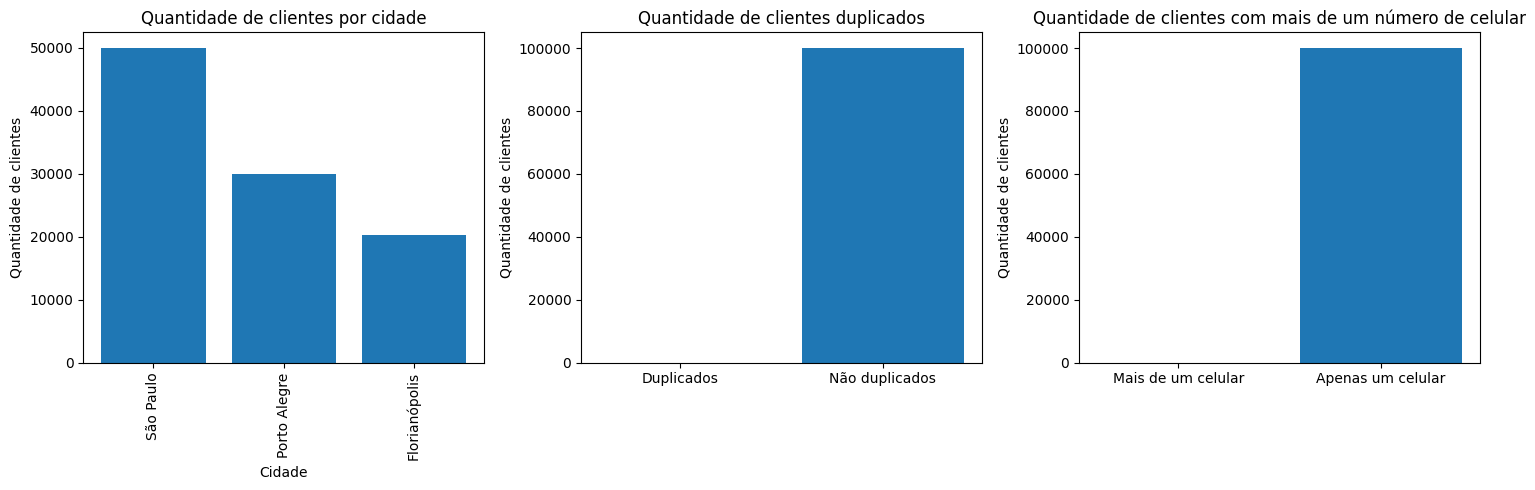

In [17]:
# crie uma sessão Spark
spark = SparkSession.builder.appName('amostra').getOrCreate()

# leia uma amostra aleatória do arquivo CSV
df = (spark.read.format('csv')
    .option('header', 'true')
    .option('index', 'false')
    .option('delimiter', ',')
    .option('encoding', 'UTF-8')
    .load('OUTPUT/NATAL_2021_NORMALIZED.csv'))

# exiba o DataFrame
display(df.limit(100).toPandas())

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico de quantidade de clientes por cidade
city_count = df.groupBy("CITY").agg(count("*").alias("CUSTOMER_COUNT")).orderBy("CUSTOMER_COUNT", ascending=False)
cities = city_count.rdd.map(lambda row: row[0]).collect()
customer_counts = city_count.rdd.map(lambda row: row[1]).collect()

axes[0].bar(cities, customer_counts)
axes[0].set_xticklabels(cities, rotation=90)
axes[0].set_xlabel("Cidade")
axes[0].set_ylabel("Quantidade de clientes")
axes[0].set_title("Quantidade de clientes por cidade")

# Gráfico de quantidade de clientes duplicados
duplicate_count = df.groupBy("CUSTOMER_ID").agg(count("*").alias("COUNT")).filter(col("COUNT") > 1)
duplicate_count = duplicate_count.agg(count("*").alias("DUPLICATE_COUNT"))
duplicate_count_value = duplicate_count.collect()[0][0]
non_duplicate_count_value = df.count() - duplicate_count_value

axes[1].bar(["Duplicados", "Não duplicados"], [duplicate_count_value, non_duplicate_count_value])
axes[1].set_ylabel("Quantidade de clientes")
axes[1].set_title("Quantidade de clientes duplicados")

# Gráfico de quantidade de clientes que têm mais de um número de celular
phone_count = df.groupBy("CUSTOMER_ID").agg(count("PHONE").alias("PHONE_COUNT")).filter(col("PHONE_COUNT") > 1)
phone_count_value = phone_count.count()
single_phone_count_value = df.count() - phone_count_value

axes[2].bar(["Mais de um celular", "Apenas um celular"], [phone_count_value, single_phone_count_value])
axes[2].set_ylabel("Quantidade de clientes")
axes[2].set_title("Quantidade de clientes com mais de um número de celular")

plt.tight_layout()
plt.show()

# encerre a sessão Spark
spark.stop()


##2.4 Documentação do código Python/Spark do execicio 2

Este código tem como objetivo configurar o ambiente para trabalhar com Spark e realizar pré-processamento em um conjunto de dados de exemplo.

### Configuração do Ambiente

1. Verifica a versão do Java instalada.
2. Instala o OpenJDK 8, compatível com o Spark.
3. Baixa os binários do Spark.
4. Extrai os binários do Spark e remove o arquivo baixado.
5. Instala a biblioteca PySpark.
6. Define as variáveis de ambiente `JAVA_HOME` e `SPARK_HOME`.

### Importação de bibliotecas

Importa as bibliotecas necessárias para o processamento dos dados e configuração do ambiente Spark.

### Download e Extração do Dataset

1. Baixa o arquivo ZIP contendo o dataset de exemplo.
2. Extrai o conteúdo do arquivo ZIP.
3. Remove o arquivo ZIP baixado.

### Funções Auxiliares

#### remove_accents

Remove acentos de uma string.

#### clean_city_ascii

Limpa e normaliza o nome da cidade removendo acentos e caracteres especiais.

#### remove_non_digits

Remove caracteres não numéricos de uma string.

### Processamento e Limpeza dos Dados

1. Inicializa uma sessão Spark.
2. Lê o arquivo CSV e cria um DataFrame.
3. Adiciona colunas de índice e partição para dividir o DataFrame em partes menores.
4. Reparticiona o DataFrame com base na coluna de partição.
5. Realiza a limpeza e transformação das colunas.
6. Salva as partições em um diretório temporário.
7. Combina as partições em um único arquivo CSV e salva o resultado.

### Verificação de Encoding do Arquivo CSV

1. Abre o arquivo em modo binário e lê os primeiros 100.000 bytes.
2. Detecta o encoding dos dados brutos e exibe o resultado.

### Leitura e Exibição de uma Amostra dos Dados Processados

1. Inicializa uma sessão Spark.
2. Lê uma amostra aleatória do arquivo CSV processado.
3. Exibe a amostra como um DataFrame do Pandas.
4. Cria três gráficos:
 * Quantidade de clientes por cidade.
 * Quantidade de clientes duplicados.
 * Quantidade de clientes com mais de um número de celular.
5. Exibe os gráficos lado a lado.
6. Encerra a sessão Spark.



# 3° Exercicio: Desenho de solução

## 3.1 infraestrutura do lakehouse

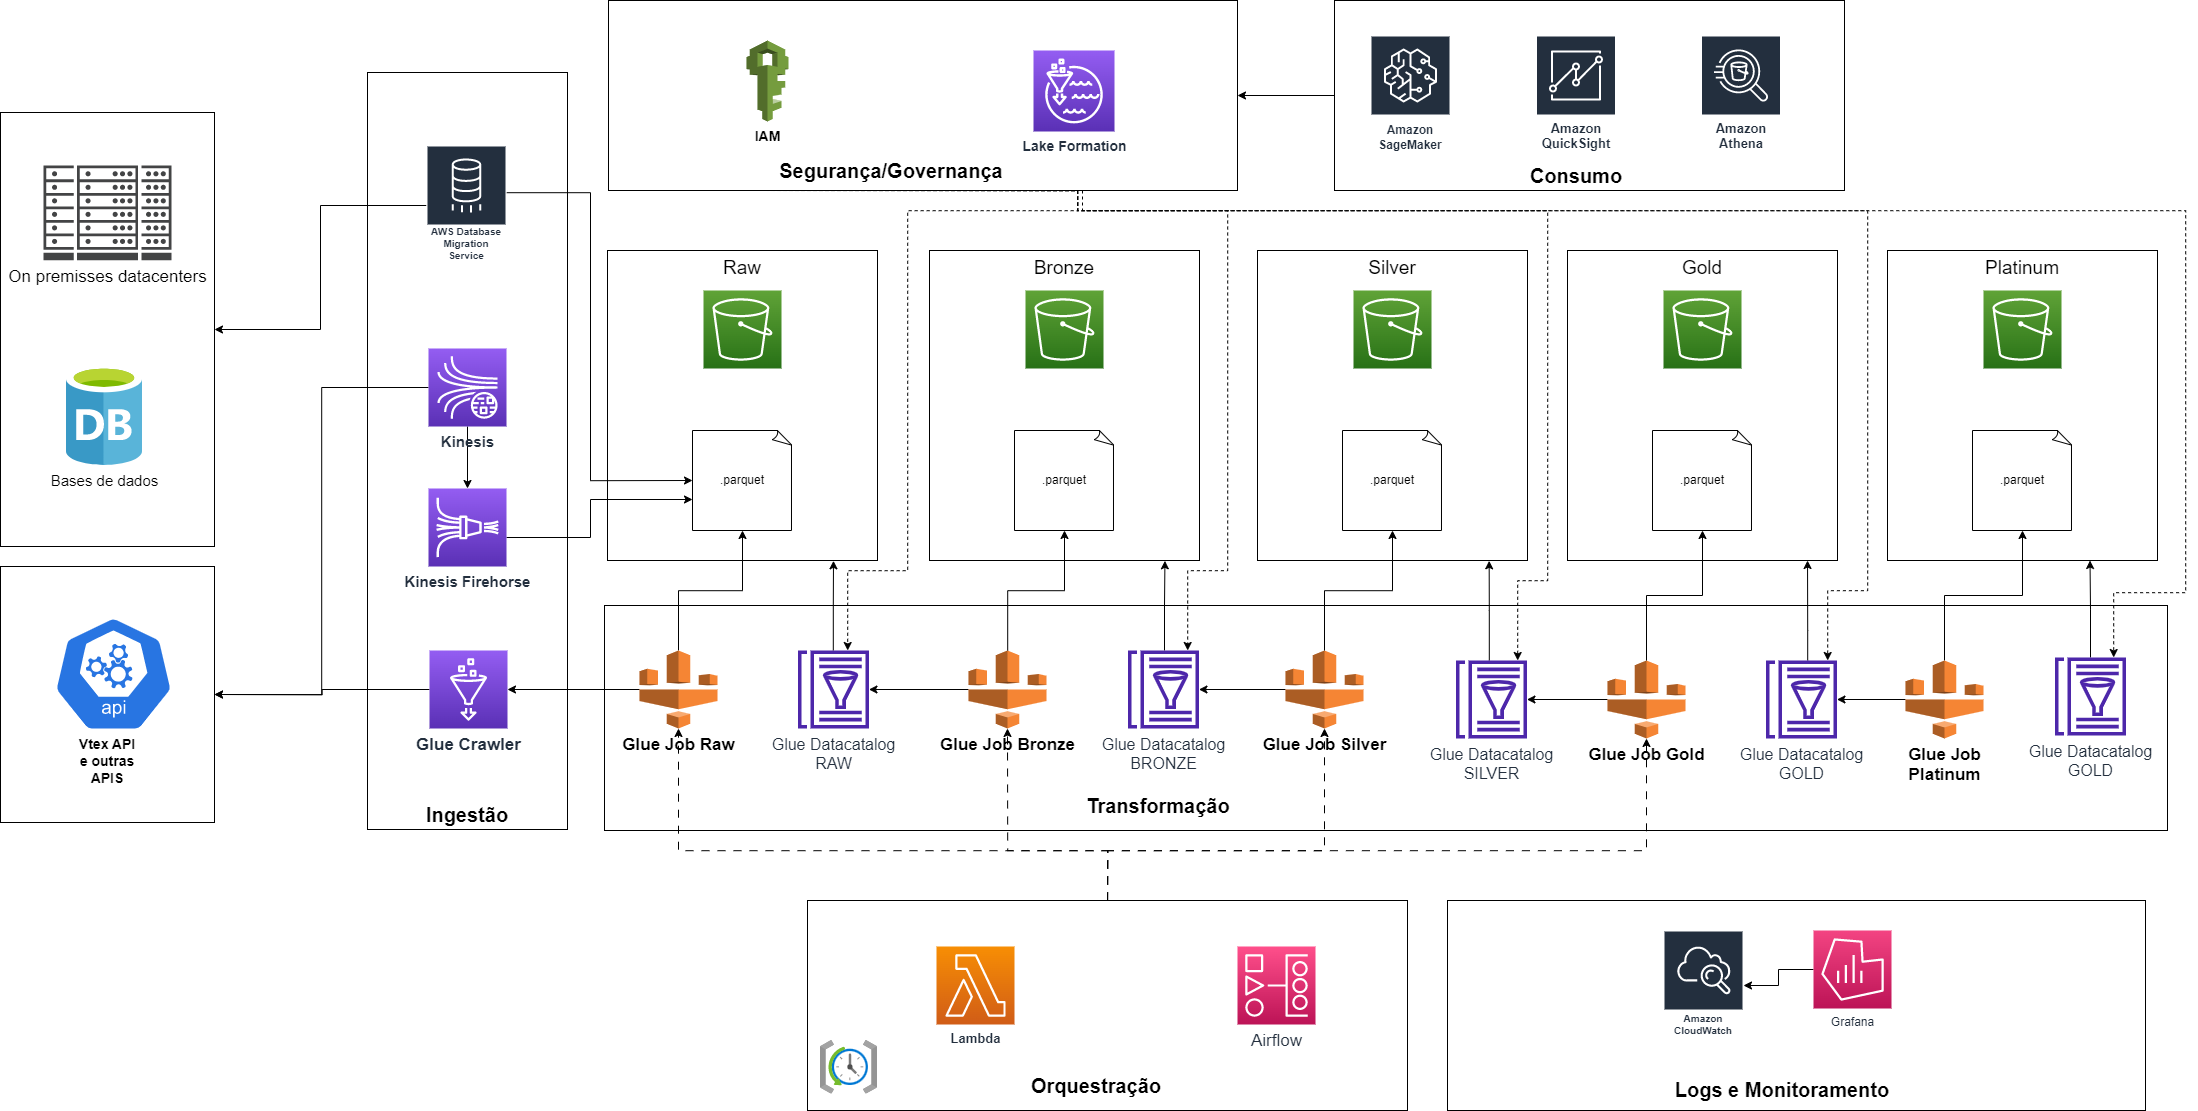

Percebi que vocês utilizam a AWS, então propus uma solução na nuvem da Amazon, espero que seja do seu agrado.

O projeto é composto por 5 camadas, incluindo as camadas Raw (dados brutos), Bronze (dados em formato padronizado), Silver (dados tratados e com data quality aplicado), Gold (visões de dimensões para consumo final) e Platinum (camada com visões analíticas e de modelagens). Essas camadas são compostas, cada uma, por um bucket S3 para armazenamento dos dados em Parquet e um catálogo no Glue para cada camada apontando para o bucket S3. Esse catálogo é gerenciado pelo Lake Formation, que fornece ferramentas de permissão em menor granularidade do dado, bem como ferramentas para governança e catalogação de dados.

A ingestão dos dados pode ser realizada de 3 formas:

1.   Crawler Glue, que é chamado por um job Glue, extrai o dado da origem e aterrissa na camada Raw. É bem indicado para fluxos batch cujas origens sejam APIs (como, por exemplo, a API da Vtex), bases de dados legadas que não suportam CDC, entre outros.

2.    Utilizando o AWS Database Migration Service (DMS), que extrai os dados da origem e aterrissa diretamente na camada Raw. É bem indicado para bases de dados relacionais e não relacionais que realizarão cargas full ou incrementais. O ganho do DMS é justamente o CDC, que cria um fluxo de dados entre bases relacionais quase que em tempo real para a camada Raw.

3.    Utilizando o Kinesis Stream e Firehose, que recebem/buscam dados em tempo real e aterrissam esses dados na camada Raw. É um serviço um pouco mais caro, no entanto, extremamente indicado em um fluxo de Stream. O Kinesis pode buscar de APIs, como a da Vtex, em tempo real e colocá-los na camada Raw.




O fluxo de manipulação de dados é realizado por 4 tipos de jobs Glue:

1.   Job Glue Bronze: O job Glue da camada Bronze é responsável por pegar os dados recebidos na camada Raw, validar se estão no padrão de ingestão do pipeline (schema, formato e etc.) e criar um empilhamento e particionamento desses dados na camada Bronze. Dessa forma, a camada Bronze tem todos os dados ainda em seu formato bruto, no entanto padronizado e com uma linha histórica.

2.   Job Glue Silver: O job Glue da camada Silver é responsável por pegar os dados da camada Bronze e aplicar um data quality neles (realizar rename de campos, realizar cast de datatypes, padronização de tipos e etc.) e depositar esses dados na camada Silver.

3.   Job Glue Gold: O job Glue da camada Gold cria/atualiza visões dimensionais dos dados na camada Silver. Por exemplo, na camada Silver, eu tenho 5 datasets de origens distintas que são referentes a dados de clientes (endereço, telefone, nome e etc.). O job da camada Gold pega esses datasets e modela as dimensões que serão usadas no futuro. No caso do exemplo, poderiam ser criadas dimensões de endereço, de contato e de pessoas.Tornando assim a camada Gold uma modelagem pronta para ser usada na criação de visões analíticas.

4.   Job Glue Platinum: O job Glue da camada Platinum alimenta-se das modelagens dimensionais da camada Gold e cria visões analíticas que serão consumidas por sistemas e algoritmos de Machine Learning (ML). Nessa camada, os dados já podem estar tokenizados.

Para garantir a integridade dos dados, podemos utilizar tecnologias como o Iceberg, Delta Lake e Hudi para realizar upserts ou overwrite dos dados sem quebrar o schema do catálogo criado no Glue.

Os dados podem ser consumidos diretamente pelo Athena, pelo QuickSight, SageMaker, entre outras ferramentas, em qualquer camada do lake. O acesso aos dados pode ser gerenciado pelo Lake Formation, evitando assim a criação de chaves desnecessárias para a conexão de ferramentas internas. Ferramentas internas como Power BI, Tableau e etc. podem se conectar usando o ODBC do Athena, por exemplo.

Para orquestrar os pipelines de ingestão de dados, podemos utilizar o Apache Airflow (pode ser MWAA ou Kubernetes) para fluxos de dados batch, realizando o agendamento das DAGs, que, por sua vez, utilizarão um Glue operator para iniciar os jobs Glue. Podemos utilizar o AWS Lambda e sensores para iniciar os jobs Glue baseados em eventos ou até mesmo iniciar DAGs do Airflow com base em um evento.

Podemos adicionar o Grafana como ferramenta de monitoramento e o CloudWatch como visualizador de logs para assegurar a disponibilidade e desempenho da arquitetura de dados.

Para a segurança geral dos buckets, precisaremos utilizar o IAM para criar usuários e roles que terão permissões explícitas para não acessar dados ou serviços importantes por parte dos engenheiros ou usuários dos dados. As permissões para consumo de dados do lake serão dadas aos usuários e roles temporariamente pelo Lake Formation.

Essa é uma arquitetura clássica de lakehouse na AWS, bastante utilizada e que já presenciei até mesmo o Professional Services da AWS implementar. Para automatizar a criação e manutenção da infraestrutura, pode-se pensar em usar o AWS CloudFormation, AWS CDK ou Terraform.

## 3.2 Pipelines que seriam desenvolvidos no lakehouse

Com base nos datasets: Catálogo de produtos, pedidos realizados e cadastro de clientes seria possível criar um modelo star schema que permita alimentar vários relatórios analíticos sendo necessarios apenas as seguintes fatos e dimensoes.

### Dimensões:

1. Dimensão de tempo: data e hora do pedido.
2. Dimensão de produtos: nome do produto, categoria, preço, fabricante, etc.
3. Dimensão de pessoa: nome, idade, gênero, endereço, etc.
4. Dimensão geográfica: país, estado, cidade, etc.
5. Dimensão de canal: celular, computador, telefone e etc.

### Fatos:

1. Fato de vendas: quantidade de produtos vendidos, receita, custo, lucro, etc.
2. Fato de clientes: número de novos clientes, número de clientes recorrentes, taxa de abandono do carrinho, etc.
3. Fato de pedidos: número de pedidos realizados, tempo médio de processamento de pedidos, número de pedidos cancelados, etc.


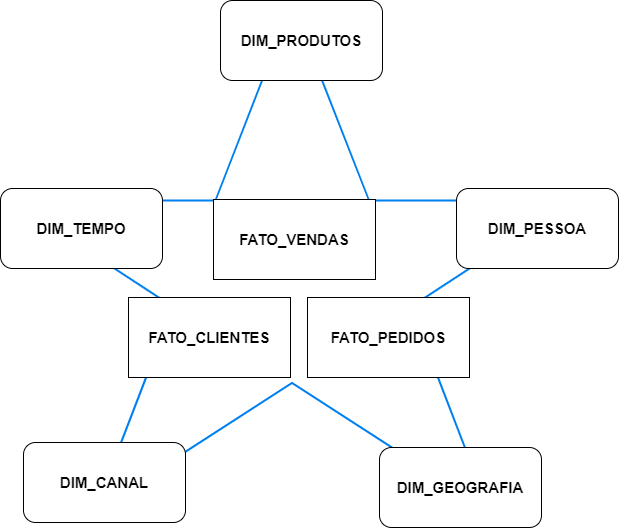

### Visoes analiticas:

Com base nessas dimensões e fatos, poderiamos criar relatórios analíticos, como:

1. Análise de vendas por produto: permitiria identificar os produtos mais vendidos em um determinado período de tempo e as categorias de produtos com o maior volume de vendas.
2. Análise de vendas por região: permitiria identificar as regiões que mais contribuem para as vendas e a distribuição geográfica das vendas.
3. Análise de clientes por idade e gênero: permitiria entender melhor o perfil dos clientes e identificar segmentos de mercado para campanhas de marketing específicas.
4. Análise de pedidos por canal: permitiria entender como os clientes preferem fazer seus pedidos (por exemplo, online, por telefone, etc.) e adaptar a estratégia de vendas para atender a essas preferências.
5. Análise de abandono de carrinho: permitiria entender por que os clientes estão abandonando o carrinho de compras e implementar melhorias na experiência do usuário para evitar esse problema.



Esses são apenas alguns exemplos de relatórios analíticos que seria possivel desenvolver com tais dados. Com apenas esses dados apenas um pipeline seria suficiente para criar as dimensoes e fatos e possibilitar as visoes analiticas, eu tambem criaria ou usaria um modelo pronto de ML no sagemaker para identificar padroes entre produto, cliente e sazonalidade, a fim de otimizar o meu estoque em detrimento dos perfis dos clientes e da sozonalidade.